# Maksimizacija vsote robov

In [22]:
clp = MixedIntegerLinearProgram(maximization=True)

In [23]:
x = clp.new_variable(binary=True)

In [24]:
n = 12

In [25]:
for i in range(n):
    clp.add_constraint(sum(x[i, j] + 2*x[j, i] for j in range(n)) == 2)

## Naključni izbor točk

In [26]:
p = {i: (random(), random()) for i in range(n)}

In [27]:
p.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [28]:
p.values()

dict_values([(0.8064718589693007, 0.8411796095805716), (0.28065199394589435, 0.6427863627906495), (0.6896351711710866, 0.08304468259131825), (0.6984905919739138, 0.2735583934245738), (0.7343919552669151, 0.5157725064299172), (0.31136393107000404, 0.06507820804888076), (0.685014722220942, 0.9004372382386687), (0.27918894078512835, 0.2185902504077114), (0.24678992054877769, 0.2820272664315431), (0.06384846386410259, 0.38324927739180104), (0.4948466715999337, 0.4631721886640946), (0.6187256483233591, 0.22414412903023107)])

In [29]:
p

{0: (0.8064718589693007, 0.8411796095805716),
 1: (0.28065199394589435, 0.6427863627906495),
 2: (0.6896351711710866, 0.08304468259131825),
 3: (0.6984905919739138, 0.2735583934245738),
 4: (0.7343919552669151, 0.5157725064299172),
 5: (0.31136393107000404, 0.06507820804888076),
 6: (0.685014722220942, 0.9004372382386687),
 7: (0.27918894078512835, 0.2185902504077114),
 8: (0.24678992054877769, 0.2820272664315431),
 9: (0.06384846386410259, 0.38324927739180104),
 10: (0.4948466715999337, 0.4631721886640946),
 11: (0.6187256483233591, 0.22414412903023107)}

## V matriki M so dolžine med točkami

In [30]:
M = matrix(RR,n)


In [31]:
for i in range(n):
    for j in range(n):
        M[i,j] = (((p[i][0])-(p[j][0]))^2 + ((p[i][1])-(p[j][1]))^2)^((0.5))

In [32]:
str(M)

'[ 0.000000000000000  0.562002144858078  0.767084988209688  0.577800829916627  0.333294607365084  0.920578755853181  0.135141787102622  0.815870569369976  0.791135396151129  0.872461859393343  0.489897813498815  0.644966219169578]\n[ 0.562002144858078  0.000000000000000  0.693237324302135  0.557600562557299  0.471181994782511  0.578523927886353  0.479471781898759  0.424198635411937  0.362344815915159  0.338176387929813  0.279536422461335  0.538103257444188]\n[ 0.767084988209688  0.693237324302135  0.000000000000000  0.190719407751420  0.435036250497232  0.378697670041809  0.817405614475584  0.432248434343852  0.485495607261763  0.694069018024461  0.427129348603312  0.157915212110360]\n[ 0.577800829916627  0.557600562557299  0.190719407751420  0.000000000000000  0.244860336570179  0.439694256588478  0.627023671914429  0.422889313457274  0.451780055310023  0.644051799777985  0.278252111672884 0.0938307825887122]\n[ 0.333294607365084  0.471181994782511  0.435036250497232  0.24486033657017

## Funkcija 'seka' pove ali daljica ij seka daljico lk

In [33]:
def zasuk(a,b,c):
    A = matrix(RR,3)
    A[0] = (1, p[a][0],p[a][1])
    A[1] = (1, p[b][0],p[b][1])
    A[2] = (1, p[c][0],p[c][1])
    return(det(A))

In [34]:
def seka(a,b,c,d):
    if zasuk(a,b,c)*zasuk(a,b,d)<0 and zasuk(a,c,d)*zasuk(b,c,d)<0:
        return(1)
    else:
        return(0)

In [35]:
seka(1,2,3,4)

0

In [36]:
zasuk(1,2,3)

0.0828736508805930

## Pogoj vzame zelo veliko časa. Za n=18 računa nekaj minut. Za večji n zmanjka prostora.

In [37]:
for i in range(n):
    for j in range(n):
        for k in range(n):
            for l in range(n):
                clp.add_constraint(x[i,j]+x[j,i]+x[k,l]+x[l,k]+seka(i,j,k,l)<=2)

In [38]:
clp.set_objective(sum(x[i, j]*M[i,j] for i in range(n) for j in range(n)))

In [39]:
clp.solve()

4.501462595894036

In [40]:
povezave = clp.get_values(x)
povezave

{(0, 0): 0.0,
 (0, 1): 0.0,
 (1, 0): 0.0,
 (0, 2): 1.0,
 (2, 0): 0.0,
 (0, 3): 0.0,
 (3, 0): 0.0,
 (0, 4): 0.0,
 (4, 0): 0.0,
 (0, 5): 0.0,
 (5, 0): 0.0,
 (0, 6): 0.0,
 (6, 0): 0.0,
 (0, 7): 0.0,
 (7, 0): 0.0,
 (0, 8): 1.0,
 (8, 0): 0.0,
 (0, 9): 0.0,
 (9, 0): 0.0,
 (0, 10): 0.0,
 (10, 0): 0.0,
 (0, 11): 0.0,
 (11, 0): 0.0,
 (1, 1): 0.0,
 (1, 2): 0.0,
 (2, 1): 0.0,
 (1, 3): 0.0,
 (3, 1): 0.0,
 (1, 4): 0.0,
 (4, 1): 0.0,
 (1, 5): 0.0,
 (5, 1): 0.0,
 (1, 6): 0.0,
 (6, 1): 1.0,
 (1, 7): 0.0,
 (7, 1): 0.0,
 (1, 8): 0.0,
 (8, 1): 0.0,
 (1, 9): 0.0,
 (9, 1): 0.0,
 (1, 10): 0.0,
 (10, 1): 0.0,
 (1, 11): 0.0,
 (11, 1): 0.0,
 (2, 2): 0.0,
 (2, 3): 0.0,
 (3, 2): 0.0,
 (2, 4): 0.0,
 (4, 2): 0.0,
 (2, 5): 0.0,
 (5, 2): 0.0,
 (2, 6): 0.0,
 (6, 2): 0.0,
 (2, 7): 0.0,
 (7, 2): 0.0,
 (2, 8): 0.0,
 (8, 2): 0.0,
 (2, 9): 0.0,
 (9, 2): 0.0,
 (2, 10): 0.0,
 (10, 2): 0.0,
 (2, 11): 0.0,
 (11, 2): 0.0,
 (3, 3): 0.0,
 (3, 4): 0.0,
 (4, 3): 0.0,
 (3, 5): 0.0,
 (5, 3): 1.0,
 (3, 6): 0.0,
 (6, 3): 0.0,
 (3, 7):

In [41]:
G = Graph([e for e, v in clp.get_values(x).items() if v == 1])
G._pos = p

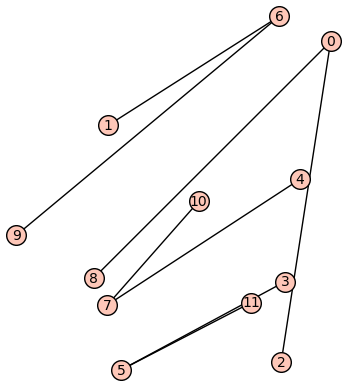

In [42]:
G.plot()

# Maksimizacija najkrajšega roba

In [24]:
clp2 = MixedIntegerLinearProgram(maximization=True)

In [25]:
y = clp2.new_variable(binary=True)

In [26]:
for i in range(n):
    clp2.add_constraint(sum(y[i, j] + 2*y[j, i] for j in range(n)) == 2)

In [27]:
for i in range(n):
    for j in range(n):
        for k in range(n):
            for l in range(n):
                clp2.add_constraint(y[i,j]+y[j,i]+y[k,l]+y[l,k]+seka(i,j,k,l)<=2)

In [28]:
from heapq import nlargest

In [29]:
nlargest(3,(M[i,j] for i in range(n) for j in range(n)))

[0.913280777181810, 0.913280777181810, 0.909693987108971]

In [81]:
sorted(M[i,j] for i in range(n) for j in range(n))

[0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.000000000000000,
 0.0795404998181121,
 0.0795404998181121,
 0.0953065800488907,
 0.0953065800488907,
 0.156359879053657,
 0.156359879053657,
 0.161422594503783,
 0.161422594503783,
 0.228250993293199,
 0.228250993293199,
 0.246840158532472,
 0.246840158532472,
 0.251113727077339,
 0.251113727077339,
 0.322094830726306,
 0.322094830726306,
 0.348601695753781,
 0.348601695753781,
 0.449281066700106,
 0.449281066700106,
 0.496955712998949,
 0.496955712998949,
 0.518281827275488,
 0.518281827275488,
 0.526282510378465,
 0.526282510378465,
 0.558020329542142,
 0.558020329542142,
 0.564967646846127,
 0.564967646846127,
 0.615481011331659,
 0.615481011331659,
 0.641584936909012,
 0.641584936909012,
 0.668530672442328,
 0.668530672442328,
 0.676913834534086,
 0.676913834534086,
 0.680905338920181,
 0.680905338920181,
 0.6816125348733

In [65]:
sorted(M[i,j] for i in range(n) for j in range(n))[-6]

1.02519359300568

In [56]:
max_symbolic(M[i,j] for i in range(n) for j in range(n))

1.17124555097897

In [71]:
min_symbolic(M[i,j] for i in range(n) for j in range(i+1,n))

0.0795404998181121

## Težava ker ne dovoli < ampak potrebujem <=

In [30]:
clp2.set_objective(min_symbolic(nlargest(n*(2/3),(y[i,j]*M[i,j] for i in range(n) for j in range(n)))))

ValueError: strict < is not allowed, use <= instead

In [31]:
clp2.solve()

0.0

In [76]:
povezave2 = clp2.get_values(y)
povezave2

{(0, 0): 0.0,
 (0, 1): 0.0,
 (1, 0): 0.0,
 (0, 2): 0.0,
 (2, 0): 0.0,
 (0, 3): 0.0,
 (3, 0): 0.0,
 (0, 4): 0.0,
 (4, 0): 0.0,
 (0, 5): 0.0,
 (5, 0): 0.0,
 (0, 6): 0.0,
 (6, 0): 1.0,
 (0, 7): 0.0,
 (7, 0): 0.0,
 (0, 8): 0.0,
 (8, 0): 0.0,
 (1, 1): 0.0,
 (1, 2): 1.0,
 (2, 1): 0.0,
 (1, 3): 0.0,
 (3, 1): 0.0,
 (1, 4): 0.0,
 (4, 1): 0.0,
 (1, 5): 0.0,
 (5, 1): 0.0,
 (1, 6): 0.0,
 (6, 1): 0.0,
 (1, 7): 0.0,
 (7, 1): 0.0,
 (1, 8): 1.0,
 (8, 1): 0.0,
 (2, 2): 0.0,
 (2, 3): 0.0,
 (3, 2): 0.0,
 (2, 4): 0.0,
 (4, 2): 0.0,
 (2, 5): 0.0,
 (5, 2): 0.0,
 (2, 6): 0.0,
 (6, 2): 0.0,
 (2, 7): 0.0,
 (7, 2): 0.0,
 (2, 8): 0.0,
 (8, 2): 0.0,
 (3, 3): 0.0,
 (3, 4): 0.0,
 (4, 3): 0.0,
 (3, 5): 0.0,
 (5, 3): 0.0,
 (3, 6): 0.0,
 (6, 3): 1.0,
 (3, 7): 0.0,
 (7, 3): 0.0,
 (3, 8): 0.0,
 (8, 3): 0.0,
 (4, 4): 0.0,
 (4, 5): 1.0,
 (5, 4): 0.0,
 (4, 6): 0.0,
 (6, 4): 0.0,
 (4, 7): 1.0,
 (7, 4): 0.0,
 (4, 8): 0.0,
 (8, 4): 0.0,
 (5, 5): 0.0,
 (5, 6): 0.0,
 (6, 5): 0.0,
 (5, 7): 0.0,
 (7, 5): 0.0,
 (5, 8): 0.0,
 (8, 5

In [77]:
G2 = Graph([e for e, v in clp2.get_values(y).items() if v == 1])
G2._pos = p

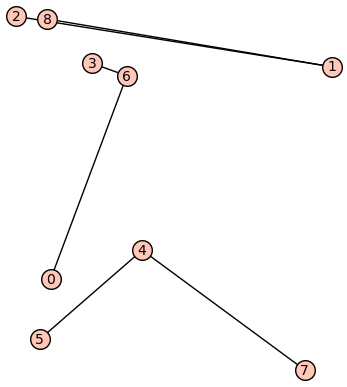

In [78]:
G2.plot()